In [10]:
# 2_Model_Training.ipynb

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Load preprocessed data
X_train = np.load('../data/X_train.npy')
X_test = np.load('../data/X_test.npy')
y_train = np.load('../data/y_train.npy')
y_test = np.load('../data/y_test.npy')

# Define image size and dataset path
IMG_HEIGHT = 32
IMG_WIDTH = 32
NUM_CLASSES = 43  # GTSRB has 43 classes

# Define the CNN model
model = Sequential()

# 1st Convolutional Block
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolutional Block
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolutional Block
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Summary of the model
model.summary()

# Callbacks
early_stop = EarlyStopping(patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('../model/traffic_sign_model.h5', save_best_only=True)

# Train model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=30,
                    batch_size=64,
                    callbacks=[early_stop, checkpoint])




c:\Users\Tarang verma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,627 (920.42 KB)

 Trainable params: 235,627 (920.42 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
489/491 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1772 - loss: 3.0276

491/491 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.1781 - loss: 3.0236 - val_accuracy: 0.6556 - val_loss: 1.1030
Epoch 2/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6478 - loss: 1.0875

491/491 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.6479 - loss: 1.0871 - val_accuracy: 0.9328 - val_loss: 0.2961
Epoch 3/30
487/491 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8418 - loss: 0.5032

491/491 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8420 - loss: 0.5025 - val_accuracy: 0.9611 - val_loss: 0.1456
Epoch 4/30
489/491 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8984 - loss: 0.3124

491/491 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8985 - loss: 0.3123 - val_accuracy: 0.9821 - val_loss: 0.0808
Epoch 5/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9266 - loss: 0.2333

491/491 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9266 - loss: 0.2332 - val_accuracy: 0.9855 - val_loss: 0.0616
Epoch 6/30
490/491 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9376 - loss: 0.2004

491/491 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9376 - loss: 0.2003 - val_accuracy: 0.9885 - val_loss: 0.0500
Epoch 7/30
489/491 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9487 - loss: 0.1630

491/491 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9487 - loss: 0.1630 - val_accuracy: 0.9860 - val_loss: 0.0435
Epoch 8/30
487/491 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9557 - loss: 0.1395

491/491 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9557 - loss: 0.1395 - val_accuracy: 0.9917 - val_loss: 0.0356
Epoch 9/30
489/491 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9610 - loss: 0.1273

491/491 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9610 - loss: 0.1273 - val_accuracy: 0.9912 - val_loss: 0.0324
Epoch 10/30
489/491 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9639 - loss: 0.1170

491/491 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9640 - loss: 0.1170 - val_accuracy: 0.9939 - val_loss: 0.0235
Epoch 11/30
487/491 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9678 - loss: 0.1033

491/491 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9678 - loss: 0.1033 - val_accuracy: 0.9940 - val_loss: 0.0212
Epoch 12/30
488/491 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9703 - loss: 0.0929

491/491 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9703 - loss: 0.0929 - val_accuracy: 0.9944 - val_loss: 0.0211
Epoch 13/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9695 - loss: 0.0915

491/491 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9695 - loss: 0.0915 - val_accuracy: 0.9952 - val_loss: 0.0186
Epoch 14/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9738 - loss: 0.0836 - val_accuracy: 0.9935 - val_loss: 0.0226
Epoch 15/30
489/491 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9718 - loss: 0.0903

491/491 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9718 - loss: 0.0903 - val_accuracy: 0.9963 - val_loss: 0.0167
Epoch 16/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9770 - loss: 0.0734

491/491 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9770 - loss: 0.0734 - val_accuracy: 0.9950 - val_loss: 0.0167
Epoch 17/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9760 - loss: 0.0752 - val_accuracy: 0.9957 - val_loss: 0.0169
Epoch 18/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9741 - loss: 0.0840 - val_accuracy: 0.9929 - val_loss: 0.0223
Epoch 19/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9772 - loss: 0.0734

491/491 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.9772 - loss: 0.0733 - val_accuracy: 0.9959 - val_loss: 0.0155
Epoch 20/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9739 - loss: 0.0871 - val_accuracy: 0.9934 - val_loss: 0.0201
Epoch 21/30
489/491 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9785 - loss: 0.0719

491/491 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.9785 - loss: 0.0718 - val_accuracy: 0.9967 - val_loss: 0.0128
Epoch 22/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.9809 - loss: 0.0641 - val_accuracy: 0.9962 - val_loss: 0.0140
Epoch 23/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9793 - loss: 0.0622 - val_accuracy: 0.9969 - val_loss: 0.0134
Epoch 24/30
488/491 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9799 - loss: 0.0625

491/491 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9799 - loss: 0.0626 - val_accuracy: 0.9972 - val_loss: 0.0125
Epoch 25/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9788 - loss: 0.0705 - val_accuracy: 0.9950 - val_loss: 0.0141
Epoch 26/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9812 - loss: 0.0594 - val_accuracy: 0.9971 - val_loss: 0.0141
Epoch 27/30
491/491 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9820 - loss: 0.0590 - val_accuracy: 0.9949 - val_loss: 0.0176


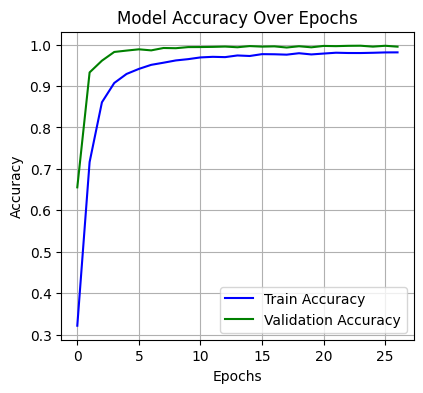

In [11]:
# Plot accuracy/loss with titles and axis labels
plt.figure(figsize=(10, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)




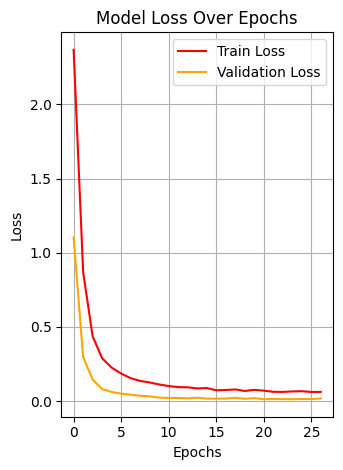

In [12]:
# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title("Model Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [13]:
# Load test data
X_test = np.load('../data/X_test.npy')
y_test = np.load('../data/y_test.npy')

# Get true class labels from one-hot encoding
y_true_classes = np.argmax(y_test, axis=1)

# Predict class probabilities using the trained model
y_pred_probs = model.predict(X_test)

# Get predicted class labels
y_pred_classes = np.argmax(y_pred_probs, axis=1)


246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


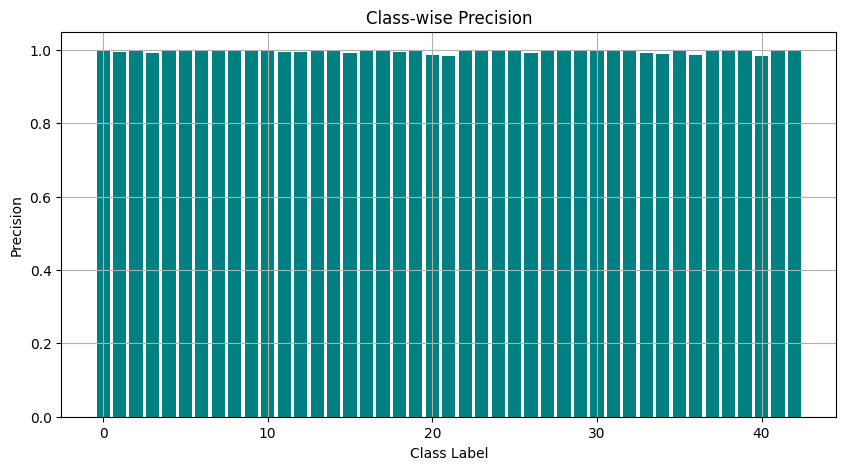

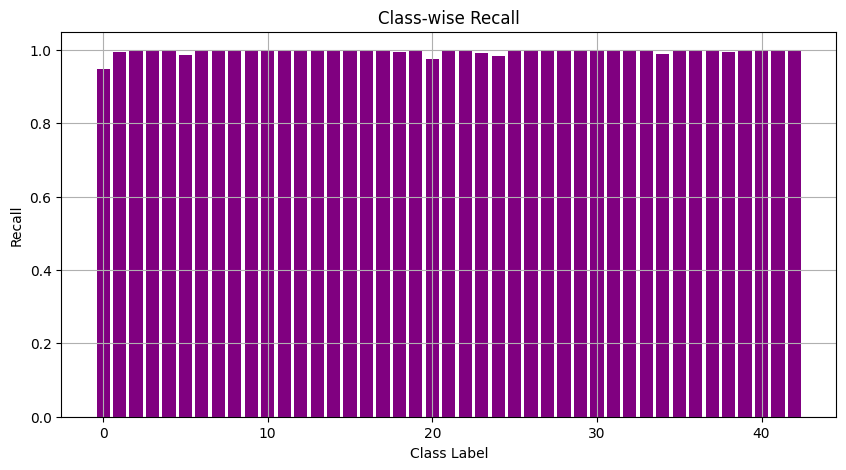

In [14]:
from sklearn.metrics import precision_recall_fscore_support

NUM_CLASSES = 43  # Total number of traffic sign classes in GTSRB

# Calculate precision and recall per class
precision, recall, _, _ = precision_recall_fscore_support(y_true_classes, y_pred_classes, labels=np.arange(NUM_CLASSES))

# Plot precision per class
plt.figure(figsize=(10, 5))
plt.bar(np.arange(NUM_CLASSES), precision, color='teal')
plt.title("Class-wise Precision")
plt.xlabel("Class Label")
plt.ylabel("Precision")
plt.grid(True)
plt.show()

# Plot recall per class
plt.figure(figsize=(10, 5))
plt.bar(np.arange(NUM_CLASSES), recall, color='purple')
plt.title("Class-wise Recall")
plt.xlabel("Class Label")
plt.ylabel("Recall")
plt.grid(True)
plt.show()
